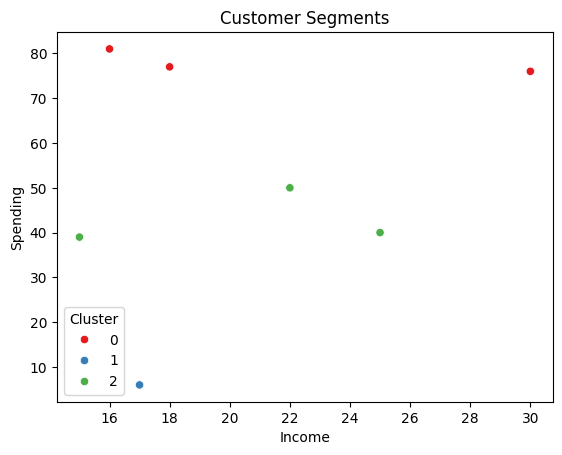

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data (Age, Annual Income, Spending Score)
data = pd.DataFrame({
    'Age': [19, 21, 20, 23, 31, 22, 35],
    'Income': [15, 16, 17, 18, 25, 30, 22],
    'Spending': [39, 81, 6, 77, 40, 76, 50]
})

# KMeans clustering into 3 groups
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data)

# Visualize
sns.scatterplot(data=data, x='Income', y='Spending', hue='Cluster', palette='Set1')
plt.title("Customer Segments")
plt.show()


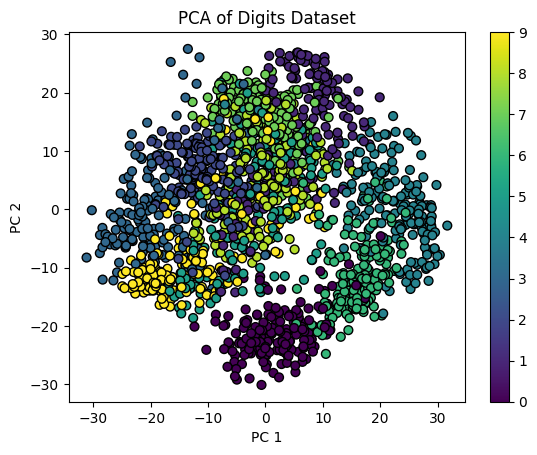

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load handwritten digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA to reduce dimensions from 64 to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title("PCA of Digits Dataset")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()


In [7]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Sample transactions (0 = not bought, 1 = bought)
dataset = pd.DataFrame([
    {'Bread':1, 'Butter':1, 'Milk':1},
    {'Bread':1, 'Butter':1, 'Milk':0},
    {'Bread':0, 'Butter':1, 'Milk':1},
    {'Bread':1, 'Butter':0, 'Milk':1},
])

# Frequent itemsets
frequent_itemsets = apriori(dataset, min_support=0.55, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


  antecedents consequents  support  confidence
0     (Bread)    (Butter)      0.5    0.666667
1    (Butter)     (Bread)      0.5    0.666667
2      (Milk)     (Bread)      0.5    0.666667
3     (Bread)      (Milk)      0.5    0.666667
4      (Milk)    (Butter)      0.5    0.666667
5    (Butter)      (Milk)      0.5    0.666667


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


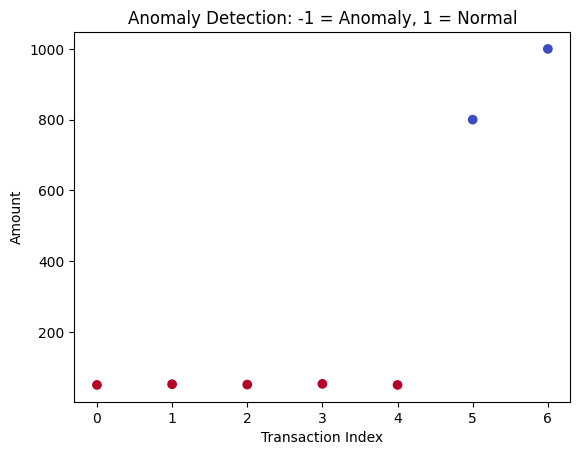

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Example transaction amounts (most are normal, 2 are outliers)
X = np.array([[50], [52], [51], [53], [50], [800], [1000]])  # 800, 1000 are anomalies

# Apply Isolation Forest
clf = IsolationForest(contamination=0.2, random_state=42)
pred = clf.fit_predict(X)

# Visualize
plt.scatter(range(len(X)), X, c=pred, cmap='coolwarm')
plt.title("Anomaly Detection: -1 = Anomaly, 1 = Normal")
plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.show()
